## Importing the packages

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import scipy
from scipy import misc

C:\Users\Satya Krishna\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Getting the data

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
y_train=np.squeeze(y_train)
y_test=np.squeeze(y_test)

## Loading the Inception V3 Architecture

In [3]:

model=InceptionV3(weights='imagenet', include_top=False, input_shape=(139,139,3))
print("Model Loaded")

Model Loaded


## Calculating the Bottleneck features for training data

In [3]:
print("Calculating the Bottleneck Features of Training Data...........")

new_X_train=np.array([misc.imresize(X_train[i],(139,139,3)) for i in range(10000)]).astype(np.float32)
inception_input=preprocess_input(new_X_train)

print("Training Data Preprocessed!!")
# Extracting the Bottleneck features of the training data.........
features=model.predict(inception_input)
features=np.squeeze(features)

print("Extracting Bottleneck features of Training Data is completed!!")

Calculating the Bottleneck Features of Training Data...........


C:\Users\dilip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Training Data Preprocessed!!
Extracting Bottleneck features of Training Data is completed!!


## Calculating the Bottleneck features for Testing data

In [4]:
print("Calculating the Bottleneck features of Testing Data..............")
new_X_test=np.array([misc.imresize(X_test[i],(139,139,3)) for i in range(5000)]).astype(np.float32)
inception_test_input=preprocess_input(new_X_test)

print("Testing Data Preprocessed!!")

# Extracting the Bottleneck Features of the testing data.......

features_test=model.predict(inception_test_input)
features_test=np.squeeze(features_test)

print("Extracting Bottleneck features of the Testing data is completed!!")

Calculating the Bottleneck features of Testing Data..............


C:\Users\dilip\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Testing Data Preprocessed!!
Extracting Bottleneck features of the Testing data is completed!!


## One Hot Encoding the labels for both training and testing data

In [16]:
from keras.utils import np_utils
num_classes=10
y_train=y_train[:10000]
y_test=y_test[:5000]

y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)


## Creating our own model

In [4]:
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
inp_shape=(3,3,2048)
model1 = Sequential()
model1.add(Conv2D(filters=100, kernel_size=2, input_shape=inp_shape))
model1.add(Dropout(0.4))
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.3))
model1.add(Dense(10, activation='softmax'))

In [18]:
model1.summary()


model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.best.hdf5', verbose=1, save_best_only=True)
model1.fit(features, y_train, batch_size=50, epochs=50, validation_split=0.2, callbacks=[checkpointer], verbose=2, shuffle=True)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 2, 2, 100)         819300    
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 100)         0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 820,310
Trainable params: 820,310
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 13s - loss: 7.6307 - acc: 

## Loading our model

In [5]:
model1.load_weights('model.best.hdf5')

In [35]:
score=model1.evaluate(features_test, y_test)
accuracy=score[1]*100

print("The Accuracy of the testing data is {0:.2f}%".format(accuracy))

5000/5000 [==============================] - 1s 255us/step
The Accuracy of the testing data is 80.30%


In [6]:
from PIL import Image

def preprocess(x):
    img=Image.open(x)
    img.load()
    x=np.asarray(img,dtype=np.float32)
    new_x=np.array([misc.imresize(x,(139,139,3))]).astype(np.float32)
    inception_x=preprocess_input(new_x)
    
    feature=model.predict(inception_x)
    feature=np.squeeze(feature)
    
    return feature

cifar_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display(y_hat, x_path,x_label):
    index=np.argmax(y_hat)
    label=cifar_labels[index]
    img=mpimg.imread(x_path)
    plt.imshow(img)
    plt.title('Predicted label : {} (Given label : {})'.format(label, x_label))

In [8]:
def predict_user_data():
    print("Enter Path of the Image :: ")
    x_path=input()
    x_path='Images/'+x_path+'.jpg'
    print("Enter the Label of the Image :: ")
    x_label=input()
    x=preprocess(x_path)
    x.resize(1,3,3,2048)

    y_hat=model1.predict(x)

    display(y_hat, x_path, x_label)

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


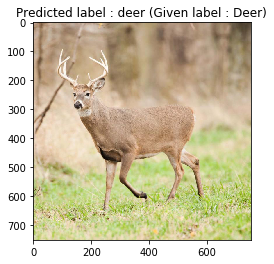

In [9]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


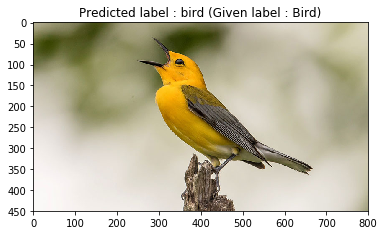

In [10]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


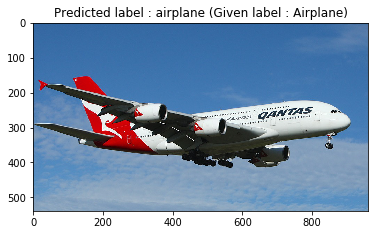

In [11]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


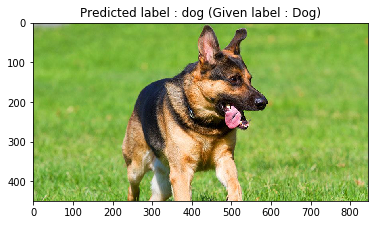

In [12]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


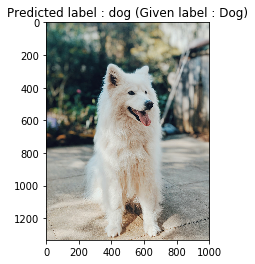

In [13]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


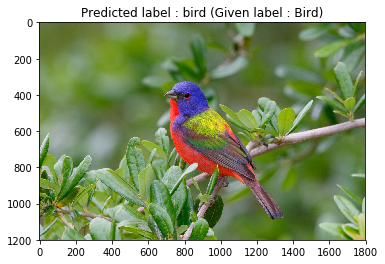

In [14]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


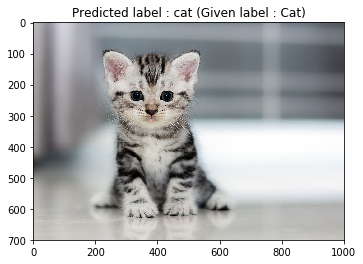

In [15]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


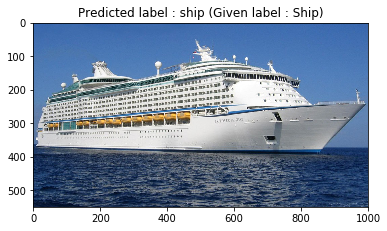

In [16]:
predict_user_data()

Enter Path of the Image :: 
Enter the Label of the Image :: 


C:\Users\Satya Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


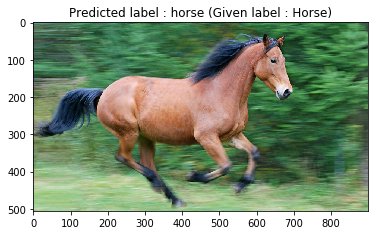

In [17]:
predict_user_data()